# COGS 108 - Spotify Metrics Over Two Decades

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [   ] NO - keep private

# Overview

Wanting to focus on music, we were most interested in how music has been changing and transforming with the rise of social media trends for apps like TikTok and Instagram. We investigated two datasets of Spotify Charts data over the past two decades and focused on the possible popularity related fluctuations in song duration, tempo, danceability, loudness, and key. Our analysis revealed that although our overall correlational pursuits for each variable of interest in relation to popularity failed to produce significant results. However, when individually compared year by year, song duration decreased, tempo increased slightly, loudness proved to be inconclusive, average key has trended towards more minor keys in recent years, and danceability increased over the course of 20 years.

# Names

- Alexandra Soltan-Kashefi
- Soumya Kalluri
- Christian Malki
- Matthew Kilzi

<a id='research_question'></a>
# Research Question

How have songs on Spotify's Charts been fluctuating in popularity in relation to duration, key, tempo, loudness, and dancebility on average in the past two decades?

<a id='background'></a>

## Background & Prior Work

After witnessing drastic changes in music over the past couple of years, we decided to conduct research on how it has specifically changed using Spotify. After some light research, we noticed that songs on the Billboard Top 100 were decreasing in length by the significant amount of 30 seconds over one year (see Reference #1). We were curious if this has been happening over the years and is visible on data charts for other music streaming services. For this reason, we decided to look at the past two decades in order to display the most comprehensive view possible. 

We were most interested in the rise of danceability and its relation to popularity given the massive success of Tiktok. This peaked our interest due to our early discovery that songs are supposedly decreasing in length. We figure this may be related to the popularity of ‘Tiktok dances’ and those that write and produce songs ‘for the algorithm’, meaning, the sole purpose of their production is so social media users may create some sort of trend using their song as their ‘sound’ for their 60 second videos or solely meant to be ‘one hit wonders’. 

We wanted to look into the changes in key, tempo, and loudness, all of which are huge variables that music production companies use in comparison to popularity to decide what kind of music to release. Specifically, a quick dive into the history of loudness revealed that it had a significant jump throughout the years of around 2010 to 2016 (see Reference #2). We’re very interested to see if this pattern has continued over the more recent years or if it was met with the rise of a competitive genre. Based on our current understanding of popular music today without the information brought to light through our curiosity-fueled Googling, we predict that loudness has increased over the recent years due to the rise in popularity of Pop and Rap.

References:
- 1) Billboard Hot 100 Top 10s in 2019 Are, On Average, 30 Seconds Shorter than Last Year (https://www.billboard.com/articles/columns/chart-beat/8514407/hot-100-top-10s-30-seconds-shorter-2019)
- 2) Why is modern music so loud? (https://www.bbc.com/news/entertainment-arts-35250557)


# Hypothesis


We hypothesize that the coming rise in popularity of dance trends on apps like Tiktok and Instagram will bring a decrease in song duration, and an increase in song output, tempo, danceability, and loudness. We believe the most popular keys will probably be C and G major, as they are usually considered to be the best for pop music. 

# Dataset(s)

Dataset 1
- Dataset Name: Spotify-Data 1921-2020 ('data.csv')
- Link to the dataset: https://www.kaggle.com/ektanegi/spotifydata-19212020
- Number of observations: ~170,000
- Description: This dataset includes detailed information for each song's popularity, including title, date, danceability, loudness, tempo, key, and duration.

Dataset 2
- Dataset Name: Spotify Dataset ('data.csv' - renamed to 'dataset.csv' in this folder)
- Link to the dataset: https://www.kaggle.com/riteshpatil8998/spotify-dataset?select=data.csv
- Number of observations: ~174,390
- Description: This dataset includes detailed information for each song's danceability, duration, key, loudness, name, year, etc. 

We will merge these two datasets into one to analyze the popularity of different songs over time in the context of their duration, key, tempo, loudness, and danceability.

# Setup

In [2]:
# initial imports/setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# to be used when large file can be read
data = pd.read_csv('data.csv')
data.head()

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [4]:
# read song_data
dataset = pd.read_csv('dataset.csv')
dataset.head()

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

# Data Cleaning

To start off our data cleaning, we remove all the unnecessary columns of data from the dataset. We only want to conduct analysis on song popularity by year in relation to tempo, key, loudness, danceability, and duration. We also want to keep the song name and artist to supplement our analysis.

In [5]:
# keep only necessary columns in all datasets
data = data[['name', 'artists', 'duration_ms', 'popularity', 'year', 'tempo', 'key', 'loudness', 'danceability']]
data.head()

name  \
0                    Singende Bataillone 1. Teil   
1       Fantasiestücke, Op. 111: Più tosto lento   
2                 Chapter 1.18 - Zamek kaniowski   
3  Bebamos Juntos - Instrumental (Remasterizado)   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61   

                                    artists  duration_ms  popularity  year  \
0                       ['Carl Woitschach']       158648           0  1928   
1  ['Robert Schumann', 'Vladimir Horowitz']       282133           0  1928   
2                   ['Seweryn Goszczyński']       104300           0  1928   
3                      ['Francisco Canaro']       180760           0  1928   
4  ['Frédéric Chopin', 'Vladimir Horowitz']       687733           1  1928   

     tempo  key  loudness  danceability  
0  118.469   10   -12.428         0.708  
1   83.972    8   -28.454         0.379  
2  107.177    5   -19.924         0.749  
3  108.003    1   -14.734         0.781  
4   62.149   11   -16.829         0.210

Next, we do the same thing for the second dataset.

In [6]:
dataset = dataset[['name', 'artists', 'duration_ms', 'popularity', 'year', 'tempo', 'key', 'loudness', 'danceability']]
dataset.head()

name  \
0                           Keep A Song In Your Soul   
1                               I Put A Spell On You   
2                                       Golfing Papa   
3  True House Music - Xavier Santos & Carlos Gomi...   
4                                          Xuniverxe   

                     artists  duration_ms  popularity  year    tempo  key  \
0            ['Mamie Smith']       168333          12  1920  149.976    5   
1  ["Screamin' Jay Hawkins"]       150200           7  1920   86.889    5   
2            ['Mamie Smith']       163827           4  1920   97.600    0   
3        ['Oscar Velazquez']       422087          17  1920  127.997    2   
4                   ['Mixe']       165224           2  1920  122.076   10   

   loudness  danceability  
0   -12.628         0.598  
1    -7.261         0.852  
2   -12.098         0.647  
3    -7.311         0.730  
4    -6.036         0.704

Now that we only have relevant columns of information, we want to only keep songs that have information in all the columns we want to analyze. Otherwise, this might introduce bias, as some songs will not be properly represented. We'll check the shape of the dataset before and after dropping NaN values to see if anything was changed.

In [7]:
# check if there are NaNs
print('data before dropping NaNs: ', data.shape)
data.dropna
print('data after dropping NaNs: ', data.shape)

data before dropping NaNs:  (169909, 9)
data after dropping NaNs:  (169909, 9)


Nothing changed for the first dataset! Let's check the second.

In [8]:
# checking to see if there are NaNs in song_data
print('song_data before dropping NaNs: ', dataset.shape)
dataset.dropna
print('song_data after dropping NaNs: ', dataset.shape)

song_data before dropping NaNs:  (174389, 9)
song_data after dropping NaNs:  (174389, 9)


Both datasets now have fully useable data, but we still need to check that the types of all columns are correct, and that we're only analyzing the years we want to focus on.

In [9]:
# check the types for charts
data.dtypes

name             object
artists          object
duration_ms       int64
popularity        int64
year              int64
tempo           float64
key               int64
loudness        float64
danceability    float64
dtype: object

The data types for each column look good. We can safely drop the years that are outside of the two decades of interest.

In [10]:
# get rid of years that we don't want, so anything before 2000 or in 2021!
data = data[data['year'] >= 2000]
data = data[data['year'] < 2021]
data.head()

name          artists  duration_ms  popularity  year  \
6054      Shout to the Lord  ['David Bauer']       313293          47  2000   
6055               Miss You   ['Etta James']       360240          51  2000   
6056              Real Eyes    ['Quasimoto']       202507          44  2000   
6057  Penguins & Polarbears  ['Millencolin']       173360          52  2000   
6058                     黃昏   ['Steve Chou']       344200          53  2000   

        tempo  key  loudness  danceability  
6054  136.123   10   -13.441         0.567  
6055  117.382    9    -9.841         0.821  
6056   89.692   11    -8.306         0.706  
6057  165.889   11    -2.757         0.368  
6058   78.045    7    -9.836         0.501

Now, our first dataset should be fully useable! Let's do the same process on the second dataset.

In [11]:
# check the types for song_data
dataset.dtypes

name             object
artists          object
duration_ms       int64
popularity        int64
year              int64
tempo           float64
key               int64
loudness        float64
danceability    float64
dtype: object

The data types are good to go, let's only keep the songs published during the decades we want.

In [12]:
# get rid of years that we don't want, so anything before 2000!
dataset = dataset[dataset['year'] >= 2000]
dataset = dataset[dataset['year'] < 2021]
dataset.head()

name  \
9071      You'll Never Walk Alone - Mono; 2002 Remaster   
9081       Ferry Cross the Mersey - Mono; 2002 Remaster   
9085   Don't Let the Sun Catch You Crying (Main) - Mono   
9087  The September Of My Years - Live At The Sands ...   
9091  It Was A Very Good Year - Live At The Sands Ho...   

                         artists  duration_ms  popularity  year    tempo  key  \
9071  ['Gerry & The Pacemakers']       160187          55  2008  113.564    0   
9081  ['Gerry & The Pacemakers']       141987          39  2008  104.536    6   
9085  ['Gerry & The Pacemakers']       157093          34  2008  106.773    1   
9087           ['Frank Sinatra']       187333          27  2018  117.153    7   
9091           ['Frank Sinatra']       236800          26  2018   82.332    7   

      loudness  danceability  
9071   -11.101         0.484  
9081   -10.226         0.405  
9085   -14.165         0.477  
9087   -17.796         0.319  
9091   -18.168         0.269

Both datasets look good, with fully useable data. No columns have null values, only the years we want to analyze are included, and we no longer have extraneous data columns. Now, we can easily merge the two datasets! :)

In [13]:
# merge song info with song data to get comprehensive songs dataframe
songs = pd.concat([data, dataset])
songs.head()

name          artists  duration_ms  popularity  year  \
6054      Shout to the Lord  ['David Bauer']       313293          47  2000   
6055               Miss You   ['Etta James']       360240          51  2000   
6056              Real Eyes    ['Quasimoto']       202507          44  2000   
6057  Penguins & Polarbears  ['Millencolin']       173360          52  2000   
6058                     黃昏   ['Steve Chou']       344200          53  2000   

        tempo  key  loudness  danceability  
6054  136.123   10   -13.441         0.567  
6055  117.382    9    -9.841         0.821  
6056   89.692   11    -8.306         0.706  
6057  165.889   11    -2.757         0.368  
6058   78.045    7    -9.836         0.501

Now both our datasets are merged together in a new dataframe called `songs`. Let's make sure the shape has the right number of rows & columns based on our old values.

In [14]:
# let's check the shape of songs, so we can see if the concat worked properly
songs.shape

(82187, 9)

Looks good so far! Next, we've merged two very large, very comprehensive datasets over a similar time period. There are bound to be duplicate songs, so let's make sure to get rid of those to prevent bias.

In [15]:
# since both datasets probably have some of the same songs, let's drop the duplicates
songs = songs.drop_duplicates()
songs.head()

name          artists  duration_ms  popularity  year  \
6054      Shout to the Lord  ['David Bauer']       313293          47  2000   
6055               Miss You   ['Etta James']       360240          51  2000   
6056              Real Eyes    ['Quasimoto']       202507          44  2000   
6057  Penguins & Polarbears  ['Millencolin']       173360          52  2000   
6058                     黃昏   ['Steve Chou']       344200          53  2000   

        tempo  key  loudness  danceability  
6054  136.123   10   -13.441         0.567  
6055  117.382    9    -9.841         0.821  
6056   89.692   11    -8.306         0.706  
6057  165.889   11    -2.757         0.368  
6058   78.045    7    -9.836         0.501

The dataframe is still looking normal, let's check the shape to see if anything was dropped.

In [16]:
# let's recheck the shape to make sure that some songs were dropped
songs.shape

(76578, 9)

Perfect, it looks like about 6000 duplicate songs were dropped. Now, we have our data in `songs` cleaned and ready for analysis. All the variables we want to analyze are laid out cleanly, the datasets have been merged. We can proceed to the data analysis.

# Data Analysis & Results

Before we begin our analysis, we first displayed the number of songs that have been released over the past twenty years in order to get a better understanding of our datasets.

<AxesSubplot:xlabel='year', ylabel='count'>

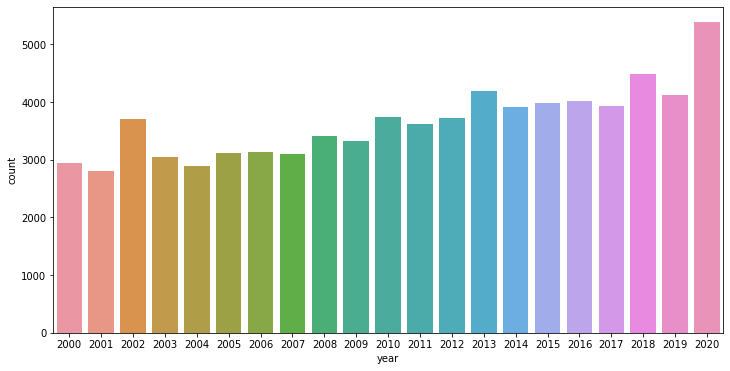

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=songs, x='year')

Here, we can see our distribution for songs has continued to increase over the past 16 years. We will have to keep this in mind when conducting our analysis further. It is prevalent that in the year 2020, there was a large increase in the number of songs released. This jump is significant in our pursuit in supporting our hypothesis.

## Graphing the Data

Before graphing our data, we will need to conduct some calculations to make the relationships between variables easier to see. Here, we will calculate the average value for each variable by year. This will allow us to graph and visually see the trends over the time period that we are analyzing (2000-2020).

In [18]:
meanbyyear = songs.groupby(['year']).mean()
meanbyyear

duration_ms  popularity       tempo       key  loudness  danceability
year                                                                         
2000  243043.775891   45.795246  118.588107  5.264856 -8.435365      0.590541
2001  240790.471597   48.964987  118.133084  5.375491 -8.046692      0.585367
2002  241598.157297   46.655405  119.339244  5.312973 -7.816151      0.574164
2003  244931.182415   46.900919  120.567539  5.380577 -7.589455      0.575186
2004  236333.115425   48.128596  121.436483  5.328596 -7.428201      0.569605
2005  234780.989426   46.424543  122.457847  5.277475 -7.776581      0.568387
2006  234582.618652   46.855637  122.188081  5.164165 -7.576478      0.558000
2007  243385.402447   47.180296  123.981857  5.274308 -7.181916      0.561691
2008  236556.256508   44.153846  122.323857  5.115823 -7.127394      0.572576
2009  242089.634425   44.625713  124.162493  5.324121 -7.122616      0.566142
2010  253326.883503   41.116765  123.422563  5.249866 -7.364521      0.586714
2011  257470.012735   43.086656  123.287909  5.310354 -7.671030      0.567248
2012  249050.977945   42.650619  122.891709  5.199839 -7.397862      0.564398
2013  261500.960831   39.193695  122.323678  5.221400 -7.857485      0.583747
2014  248155.228608   42.312133  123.622903  5.270498 -7.479811      0.589176
2015  244631.037205   43.535194  120.404509  5.266717 -8.187825      0.574186
2016  240628.534080   44.108209  121.567679  5.348756 -7.997084      0.589832
2017  226437.135252   47.985481  119.532602  5.181610 -8.227317      0.594993
2018  214643.849153   45.081996  122.824846  5.384804 -7.773915      0.629676
2019  211795.696442   50.757686  120.602757  5.234326 -8.288232      0.623510
2020  211653.979391   38.830486  123.076403  5.307464 -7.749309      0.625752

Now that we have a neat dataframe of the mean variables by year, let's graph each one individually to see their relationships over time.

We'll start with average song duration.

<AxesSubplot:xlabel='year', ylabel='duration_ms'>

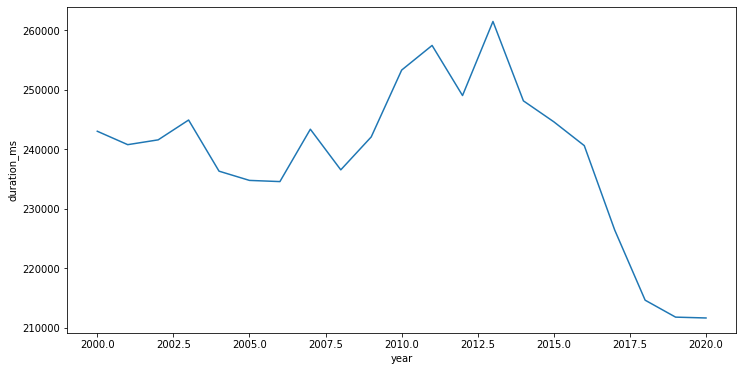

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=meanbyyear, x="year", y="duration_ms")

This graph displays a sharp decrease in the duration of songs released starting around 2013. We believe this drop may be in relation to the rise in social media, specifically, the popularity of short dance-like videos. The dip started to plateau around 2020, our last year of interest, and we believe this may be due to a desired standard length achieved by production companies. This may also be because a song can only be so short before it becomes closer to the length of an interlude, which is what some artists like to include as a pause or break in between the other main songs on the album.

Next, let's take a look at tempo over the years.

<AxesSubplot:xlabel='year', ylabel='tempo'>

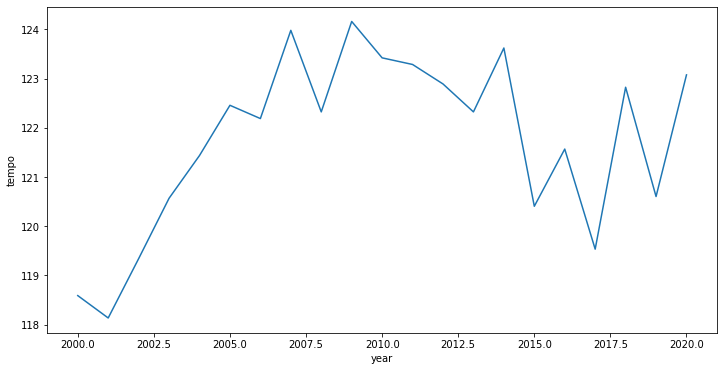

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=meanbyyear, x="year", y="tempo")

Overall, tempo seems to have always been on the higher side but has increased over the past five years since the fall of Dubstep in 2013. We believe that tempo was at an increased level between 2006 and 2012 due to more popular genres during this time like Modern Rock, and Electronic music like Dubstep and EDM that typically have faster tempos. As for the more recent jump in tempo, we believe that this may be attributed to the rise in popularity of songs with more energy to dance to for the purpose of ‘trendy’ video production.

Next, let's take a look at loudness.

<AxesSubplot:xlabel='year', ylabel='loudness'>

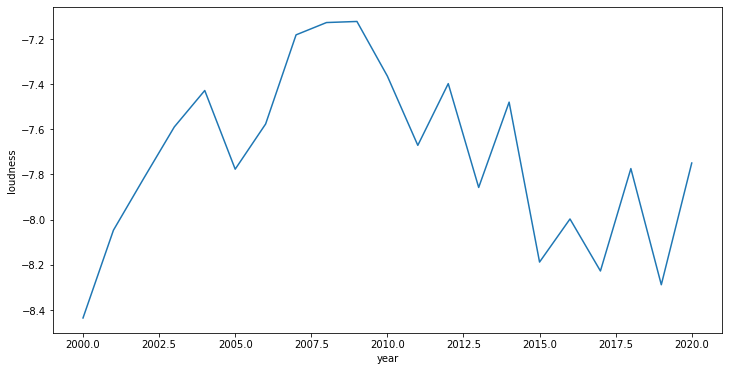

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=meanbyyear, x="year", y="loudness")

Looking at loudness, we can see a large peak in the early 2000s, and a general decrease around 2010. While we had initially hypothesized that loudness would continue to increase with time, this trend is reflective of the rise & fall of punk rock/electronic music, and the more recent increase in popularity of soft pop, R&B, and rap music, which tends to be more quiet than the previously listed categories.

Next, we will take a look at danceability.

<AxesSubplot:xlabel='year', ylabel='danceability'>

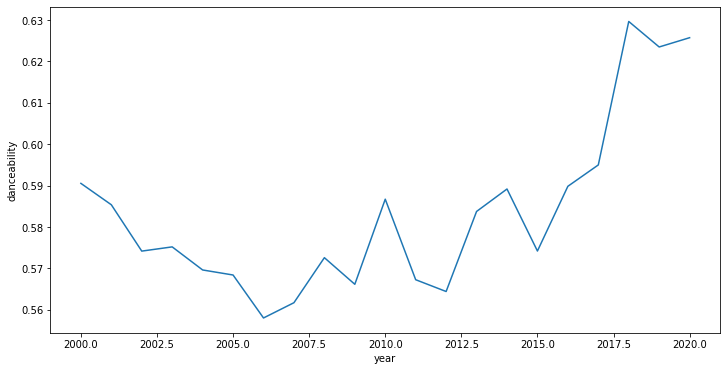

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(data=meanbyyear, x="year", y="danceability")

Danceability is really interesting to look at in the frame of recent popular social media! As we stated in our hypothesis, the rise in short, trendy music videos, specifically written to be danced to, may have contributed to this peak in danceability.

Overall, the variables that we've looked at have definitely changed over time.

Next, we will take a look at key changes over time. Since this is not an easy "average" value that we can take, we decided to display this a little differently, using both mean and mode to see if there is a trend towards a particular key. Note: the key values are displayed numerically, but the numbers correspond to a key going up the chromatic scale, with 0 respresenting C Major.

<AxesSubplot:xlabel='year'>

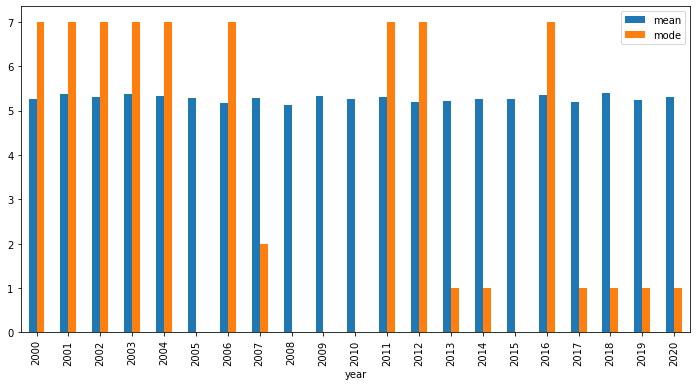

In [23]:
#key calculations
yeargroups = songs.groupby(['year'])
mean=yeargroups['key'].mean()
mode=songs.groupby(['year'])['key'].agg(lambda x: pd.Series.mode(x)[0])

keygroups = pd.concat([mean, mode], axis=1)
keygroups.columns.values[0] = "mean"
keygroups.columns.values[1] = "mode"

keygroups.plot.bar(figsize=(12,6))

While the mean key has remained roughly the same (as expected), the mode changes vastly over time. In fact, it seems as though we have taken a trend towards more minor keys in recent years. This definitely requires more analysis to see if these trends are significant.

Next, we will see if there is any relation between song popularity and other variables over time. Notice: we used the mean popularity for these graphs. While we included them because they were part of our research, we believe this method of analysis is flawed, so we proceeded to do more charting with popularity as well.

First, we will look at the relation between song duration and song popularity.

<AxesSubplot:xlabel='duration_ms', ylabel='popularity'>

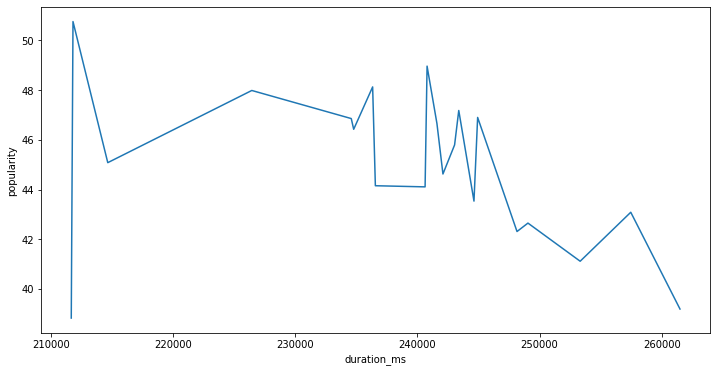

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(data=meanbyyear, x="duration_ms", y="popularity")

In [69]:
model = ols('popularity ~ duration_ms', data=songs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1440.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          4.20e-312
Time:                        19:53:25   Log-Likelihood:            -3.5001e+05
No. Observations:               76578   AIC:                         7.000e+05
Df Residuals:                   76576   BIC:                         7.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      49.8950      0.161    309.287      0.000      49.579      50.211
duration_ms -2.191e-05   5.77e-07    -37.942      0.000    -2.3e-05   -2.08e-05
==============================================================================
Omnibus:                     7878.021   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9640.836
Skew:                          -0.844   Prob(JB):                         0.00
Kurtosis:                       2.581   Cond. No.                     5.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


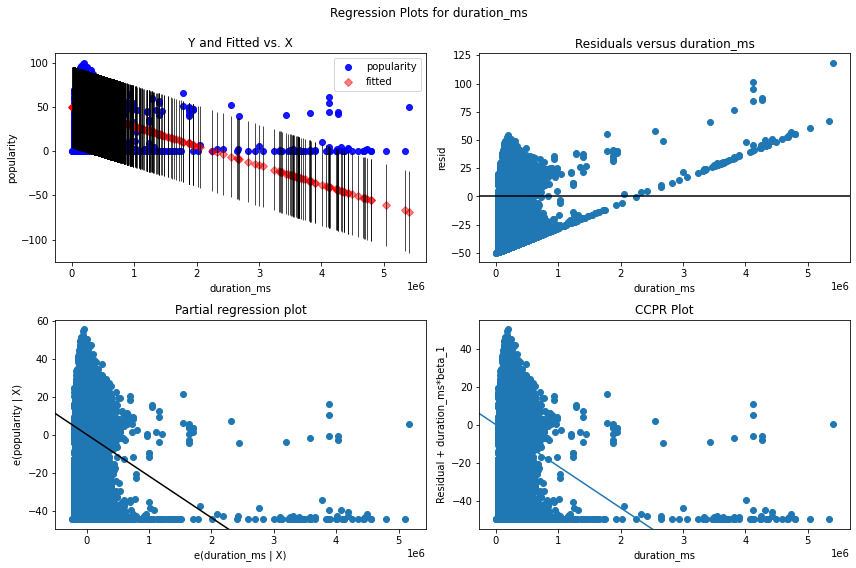

In [70]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'duration_ms', fig=fig)

Based on this graph, we can imply that the shorter the song duration, the more popular the song will be. These songs are not separated by year, so this was a consistent trend over all the two decades.

The OLS regression also supports this conclusion. Upon first glance of the model summary, the r-squared value is very low (1.8%), which seems to indicate a very low correlation between duration and popularity. However, the graph is skewed left, as we have many more data points with shorter song duration and higher popularity than longer ones. Looking at the residual plots, we can also see that there are many outliers with a long song duration and mid to high popularity, but they seem to be more of outliers than the norm. Furthermore, because our F-Statistic probability is so close to zero, the results are significant.

Next, we'll look at song popularity and tempo.

<AxesSubplot:xlabel='tempo', ylabel='popularity'>

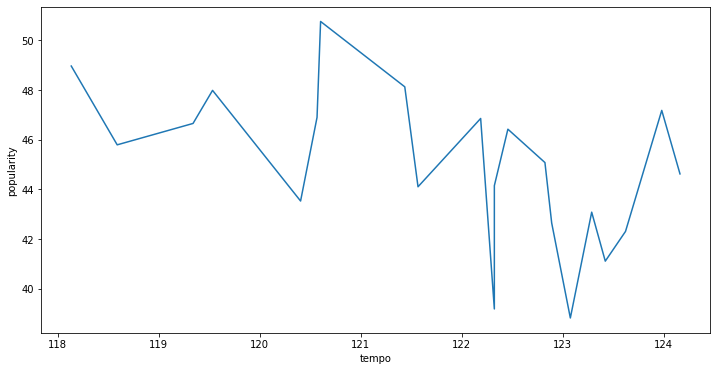

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(data=meanbyyear, x="tempo", y="popularity")

In [71]:
model = ols('popularity ~ tempo', data=songs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     137.9
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           8.23e-32
Time:                        20:08:04   Log-Likelihood:            -3.5066e+05
No. Observations:               76578   AIC:                         7.013e+05
Df Residuals:                   76576   BIC:                         7.013e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.7879      0.360    135.511      0.000      48.082      49.494
tempo         -0.0337      0.003    -11.742      0.000      -0.039      -0.028
==============================================================================
Omnibus:                     8108.197   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9698.004
Skew:                          -0.841   Prob(JB):                         0.00
Kurtosis:                       2.538   Cond. No.                         530.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


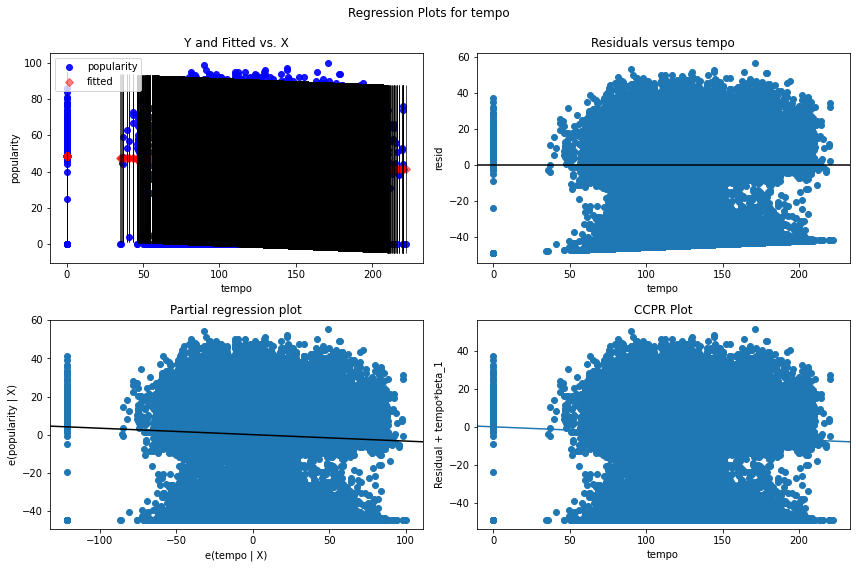

In [72]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'tempo', fig=fig)

Comparing popularity and tempo for our entire dataframe was one of our most unsuccessful graphs. There was too much variability to begin with because every song over the course of 20 years was included. For this reason, we included graphs that compared these values by year in the next section. 

Looking at the OLS regression results, we also get the same idea that there is no correlation between tempo and popularity. The r-squared value is close to 0, and the model's residual plots show that the linear regression line does not fit the data at all. Therefore, tempo and popularity have had no clear correlation in the past two decades.

Next, we will look at song popularity and danceability.

<AxesSubplot:xlabel='popularity', ylabel='danceability'>

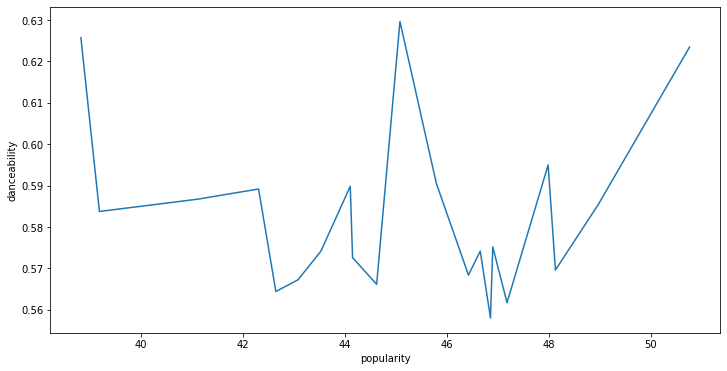

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(data=meanbyyear, x="popularity", y="danceability")

In [73]:
model = ols('popularity ~ danceability', data=songs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1056.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          4.39e-230
Time:                        20:15:42   Log-Likelihood:            -3.5020e+05
No. Observations:               76578   AIC:                         7.004e+05
Df Residuals:                   76576   BIC:                         7.004e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.4398      0.297    119.448      0.000      34.858      36.021
danceability    15.7747      0.485     32.497      0.000      14.823      16.726
==============================================================================
Omnibus:                     8182.955   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10198.392
Skew:                          -0.870   Prob(JB):                         0.00
Kurtosis:                       2.589   Cond. No.                         7.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


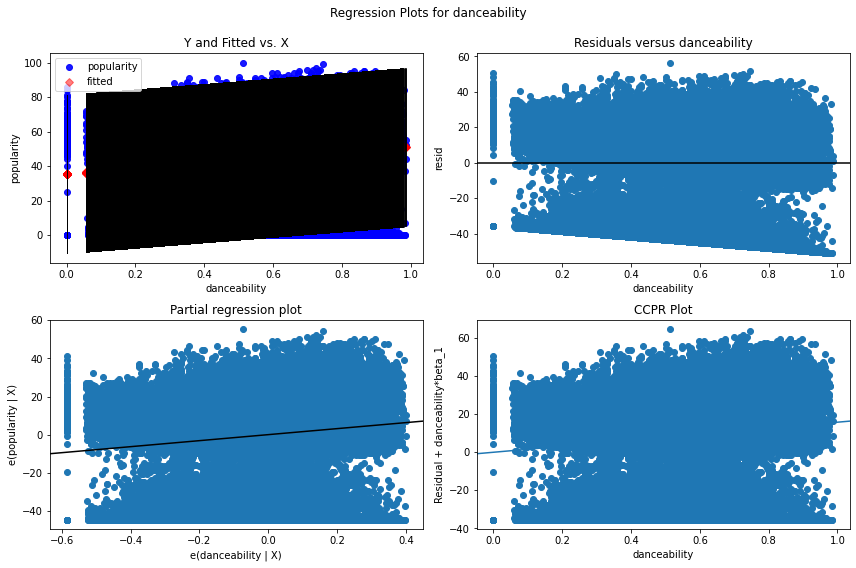

In [74]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'danceability', fig=fig)

In the case of comparing popularity and danceability over the past 20 years, we deal with the similar case of too much variability. Although it seems like the most popular songs are those with the highest levels of danceability, the same is true for songs with the lowest levels as well. For this reason, we included this variable in the graphs that compared these values by year.

The OLS regression plots only confirmed the original graph. The popularity and danceability of different songs are all over the place due to the overflow of genres in the course of two decades. The r-squared value is extremely low, and the residuals are not close to the model at all.

Finally, we'll look at popularity and loudness.

<AxesSubplot:xlabel='popularity', ylabel='loudness'>

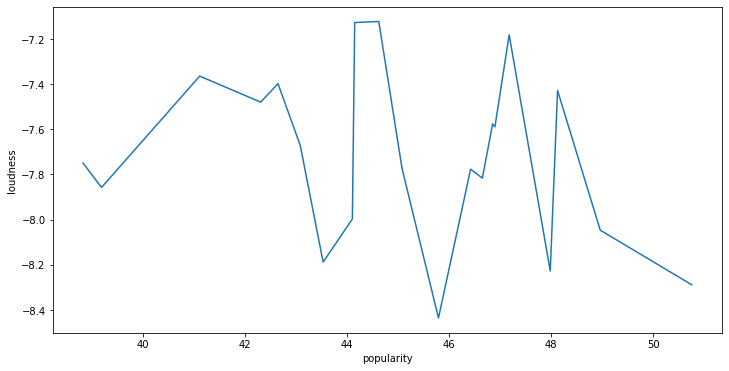

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(data=meanbyyear, x="popularity", y="loudness")

In [75]:
model = ols('popularity ~ loudness', data=songs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1958.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:19:27   Log-Likelihood:            -3.4976e+05
No. Observations:               76578   AIC:                         6.995e+05
Df Residuals:                   76576   BIC:                         6.995e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.9837      0.165    308.111      0.000      50.659      51.308
loudness       0.8153      0.018     44.249      0.000       0.779       0.851
==============================================================================
Omnibus:                     7445.253   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8799.549
Skew:                          -0.801   Prob(JB):                         0.00
Kurtosis:                       2.560   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


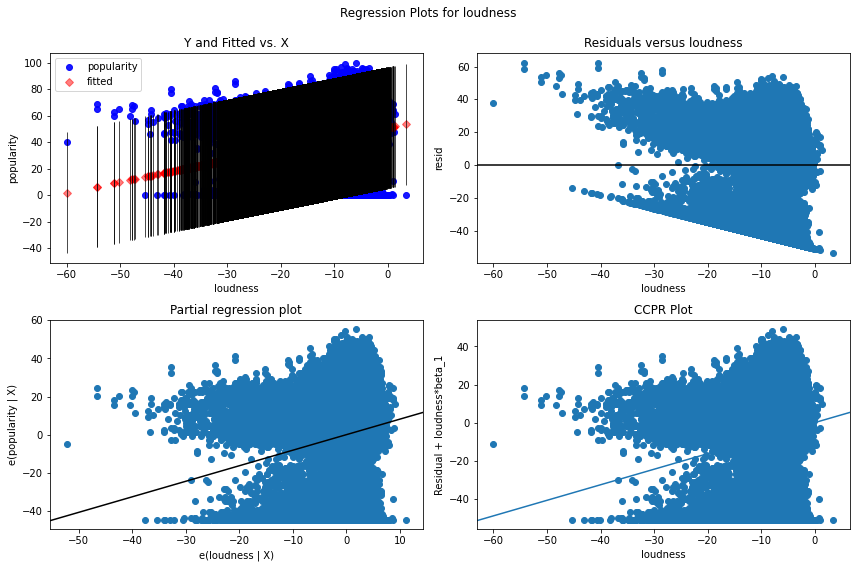

In [76]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'loudness', fig=fig)

Popularity and loudness do not seem to have a strong correlation over the past two decades. It's interesting to note that many songs seem to be on the louder end of the spectrum, regardless of popularity, but there is no actual linear correlation between the two. 

The linear regression model also supports this, with a low r-squared value, high variability, and residual plots showing what we already noted (many louder songs, but not necessarily more popular). Overall, the model doesn't seem to fit the dataset very well.

Since the graphs comparing popularity with our other variables of interest above do not provide us with a clear picture of the trends, we decided to instead graph each year as a scatterplot with popularity and duration of each individual song displayed. The results for each category are listed below. 

<Figure size 864x432 with 0 Axes>

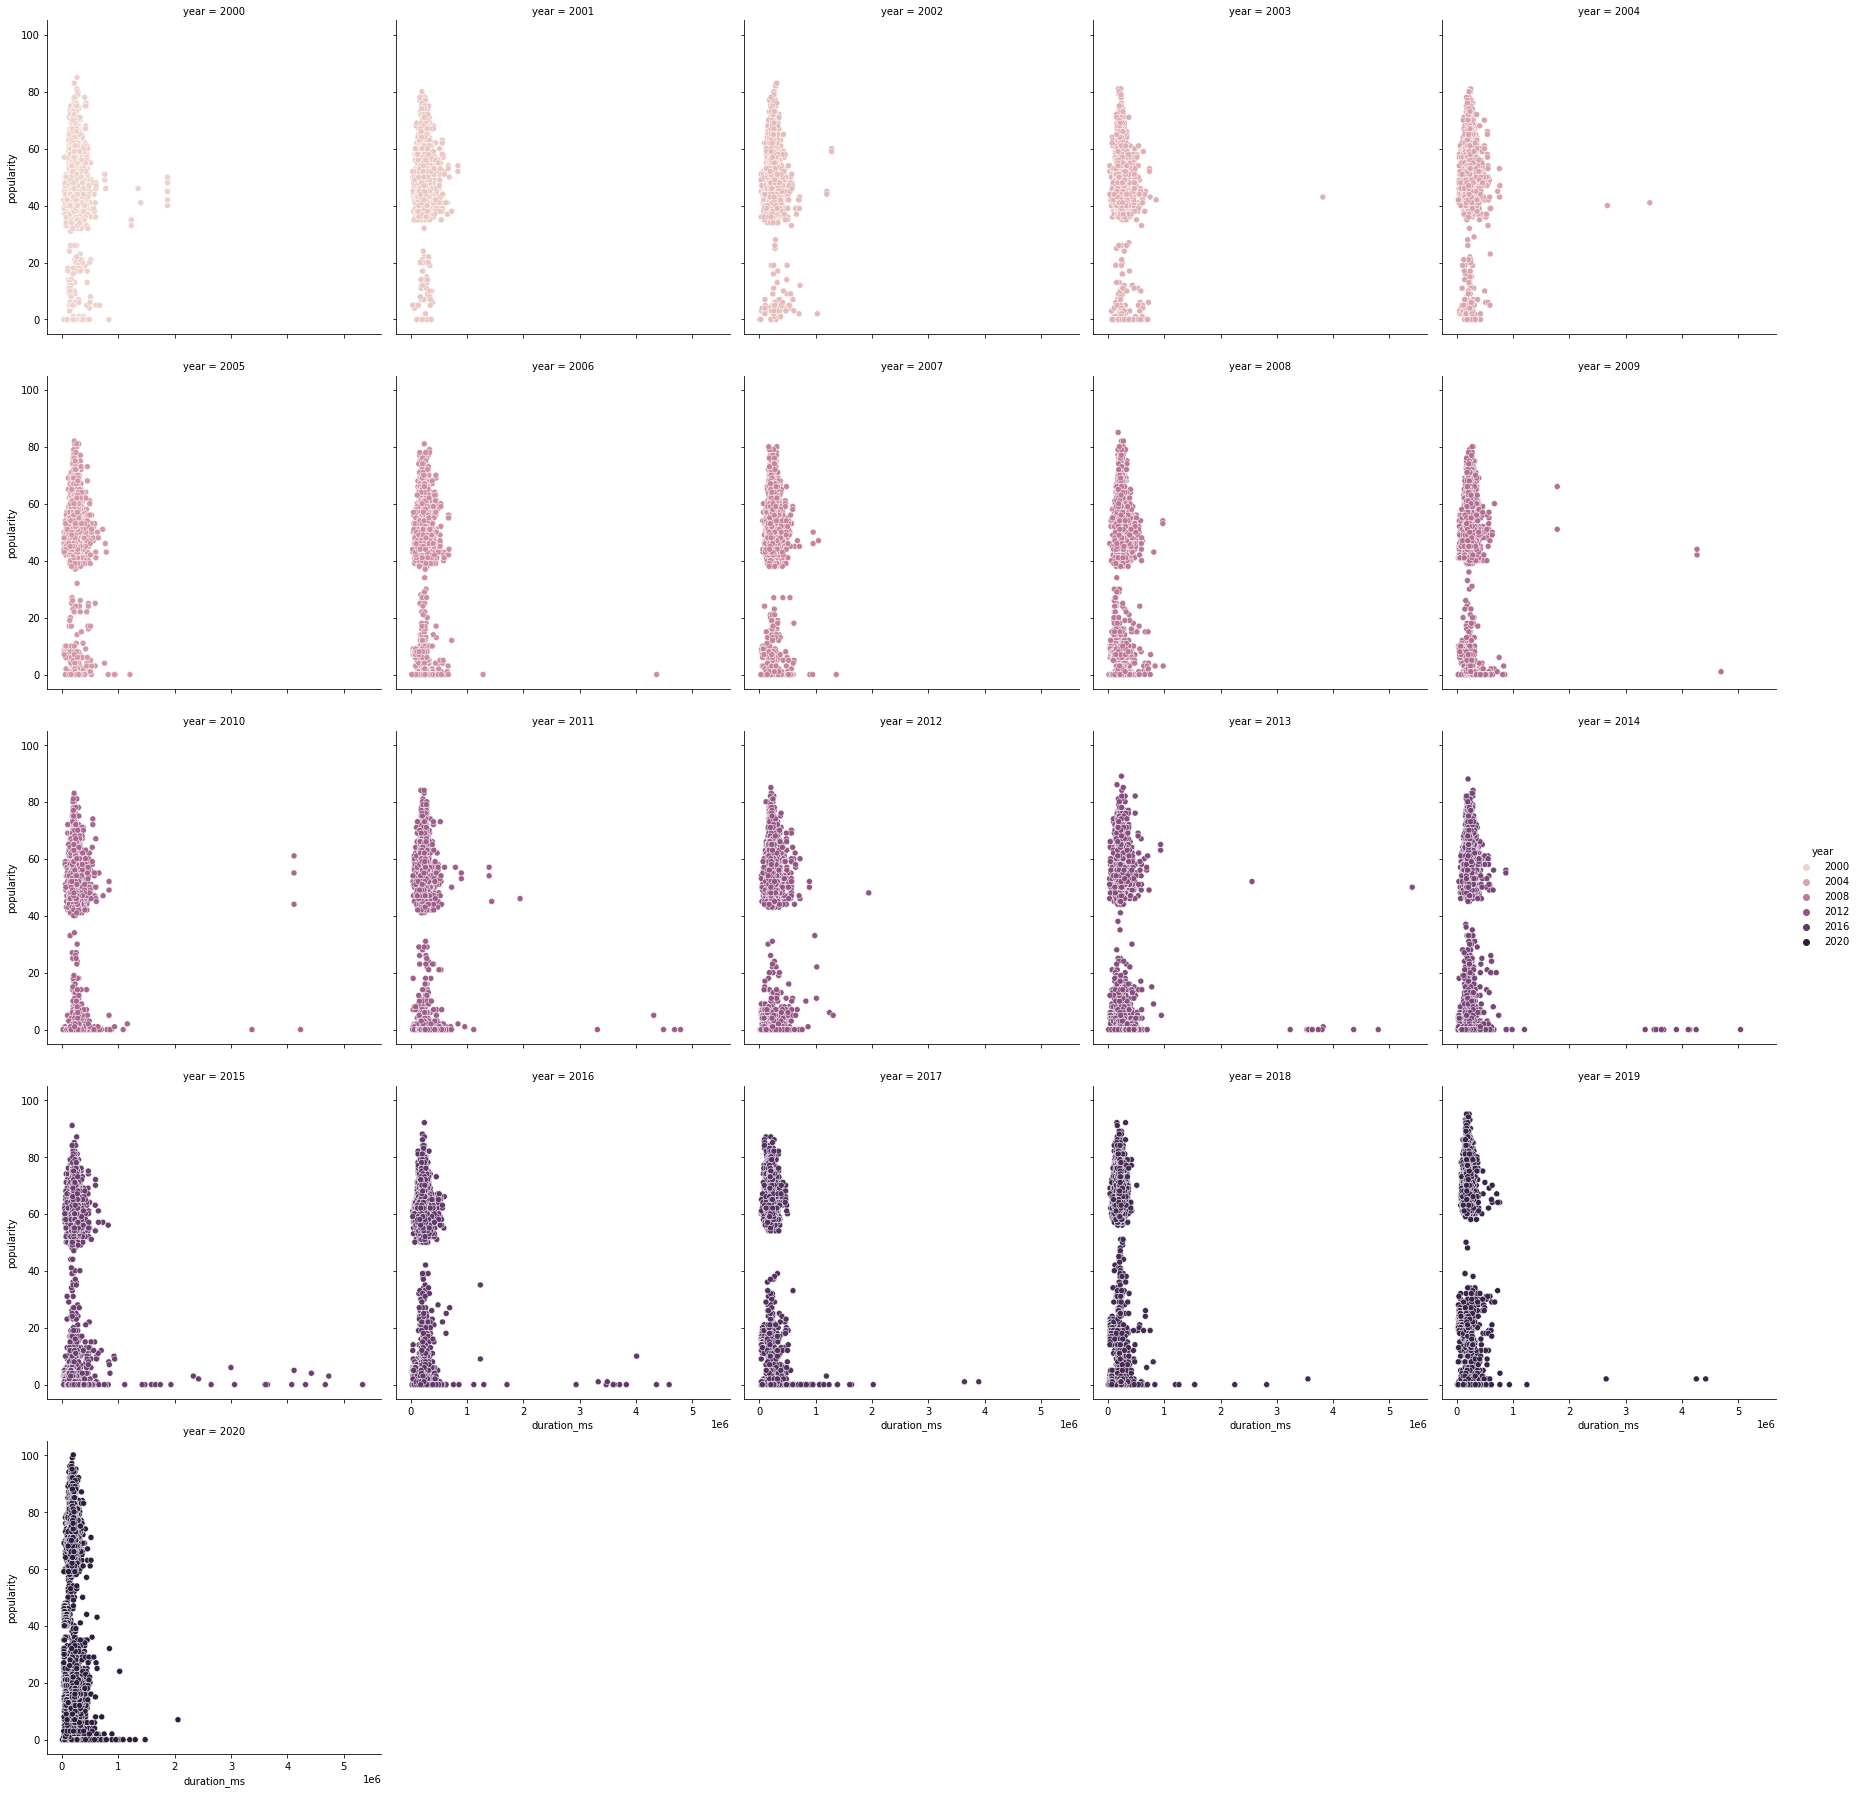

In [28]:
plt.figure(figsize=(12,6))
sns.relplot(data=songs, x='duration_ms', y='popularity', col='year', hue='year', kind='scatter', col_wrap=5)

While early songs have outliers of higher duration and high popularity, as the years progressed, songs of shorter duration began to dominate the charts according to these statistics. This is interesting to note because 2000 more songs were released in the later years compared to earlier years in the dataset. With this, they still didn't meet either criteria of being ‘long’ and ‘popular’.

Next, let's take a look at tempo over time.

<Figure size 864x432 with 0 Axes>

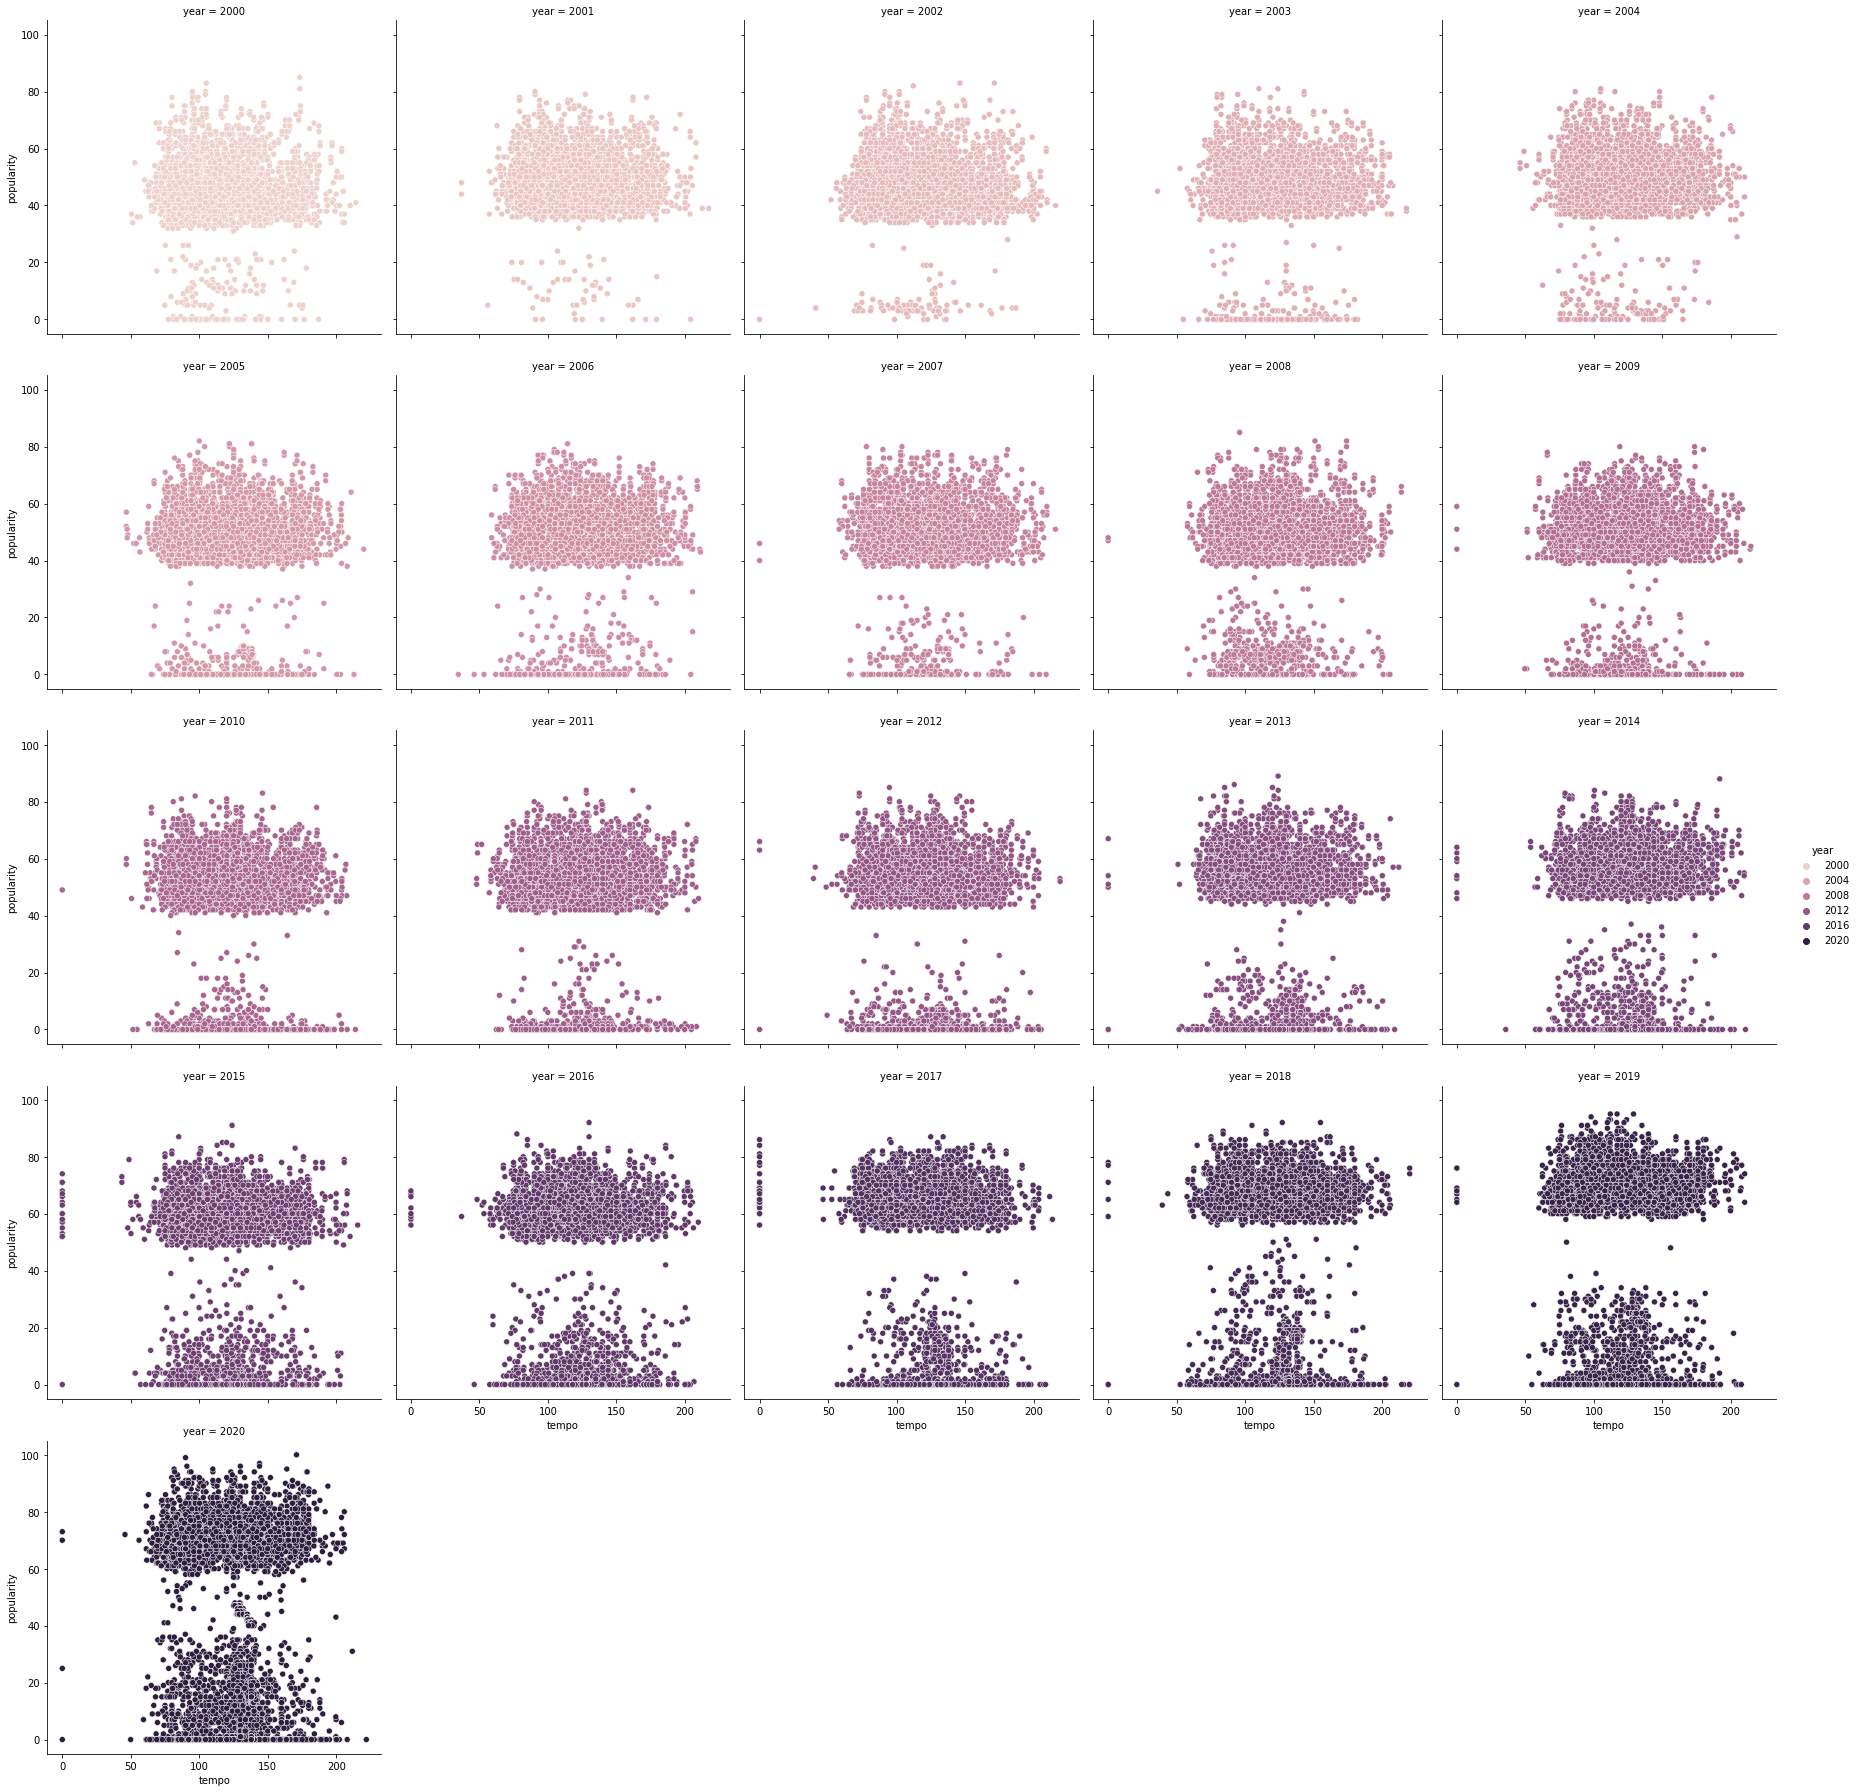

In [28]:
plt.figure(figsize=(12,6))
sns.relplot(data=songs, x='tempo', y='popularity', col='year', hue='year', kind='scatter', col_wrap=5)

Tempo proved to be more difficult in visualizing a clear difference over time. While it does appear to display a trend of more recent songs with higher tempos regardless of popularity, this could also be a simple case of having more songs circulating on the charts in more recent years.

Next, we will look at loudness and popularity over time.

<Figure size 864x432 with 0 Axes>

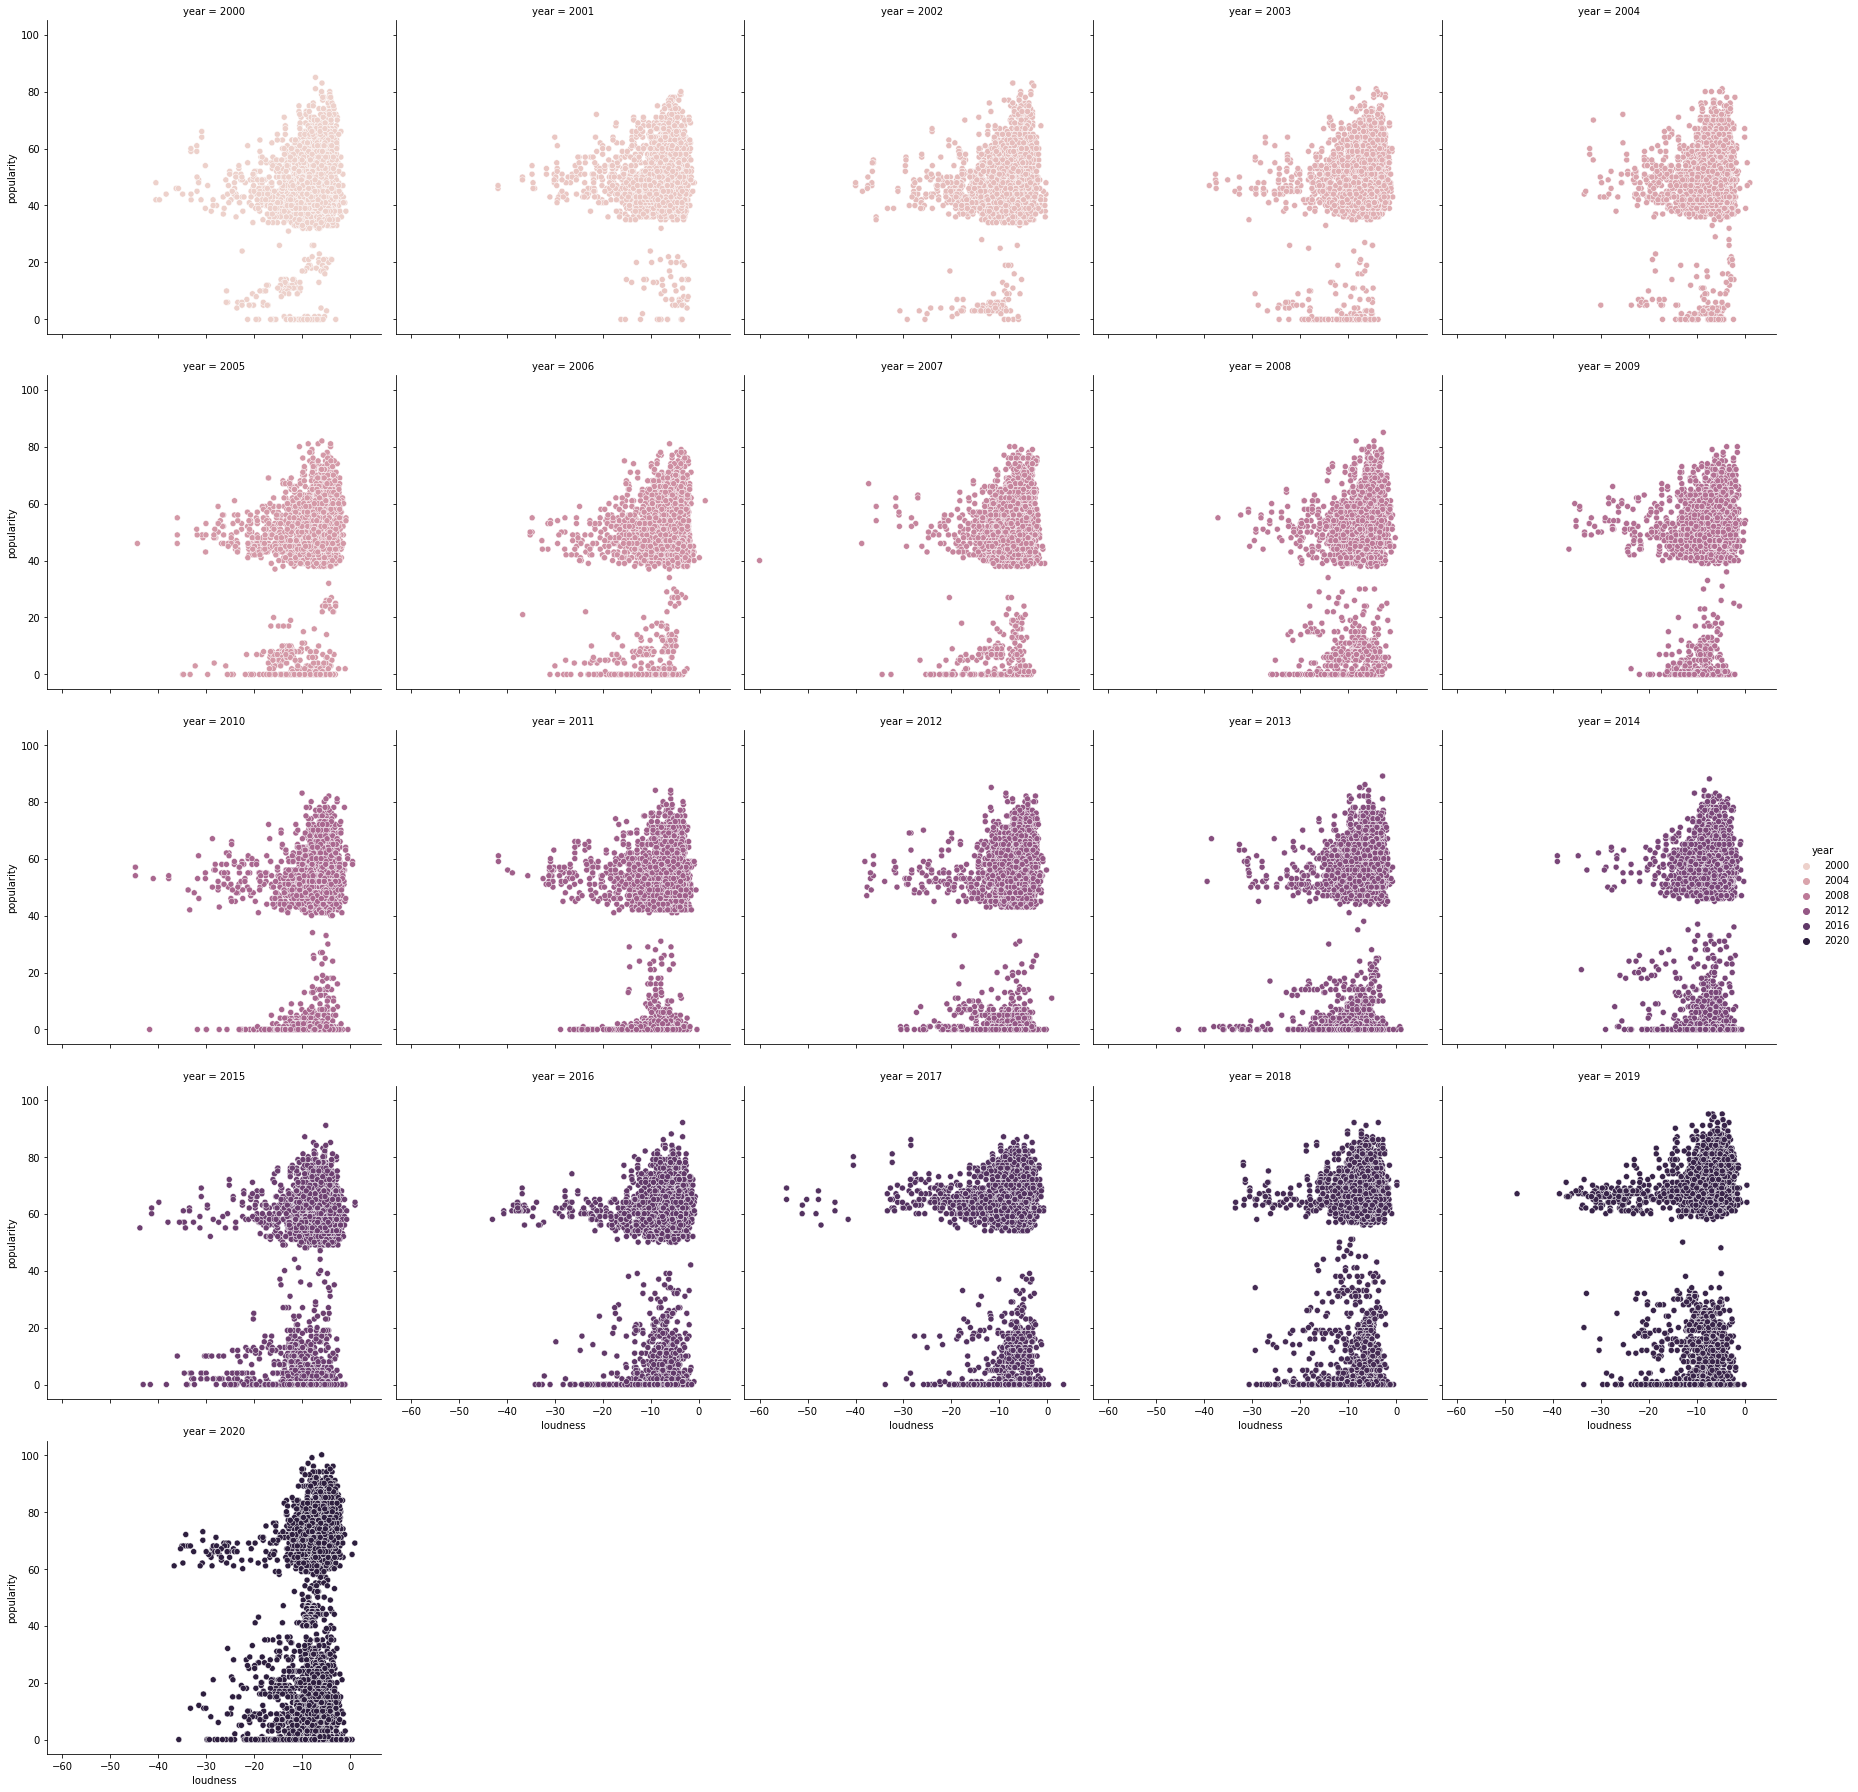

In [29]:
plt.figure(figsize=(12,6))
sns.relplot(data=songs, x='loudness', y='popularity', col='year', hue='year', kind='scatter', col_wrap=5)

Loudness also proved to be very difficult in pinning clear trends. As the original mean graph had shown, there seemed to be a fluctuation back and forth between the popularity of quieter songs, and louder songs. Overall, it does not seem to have changed significantly over the full course of two decades.

Finally, let's take a look at danceability and popularity over the years.

<Figure size 864x432 with 0 Axes>

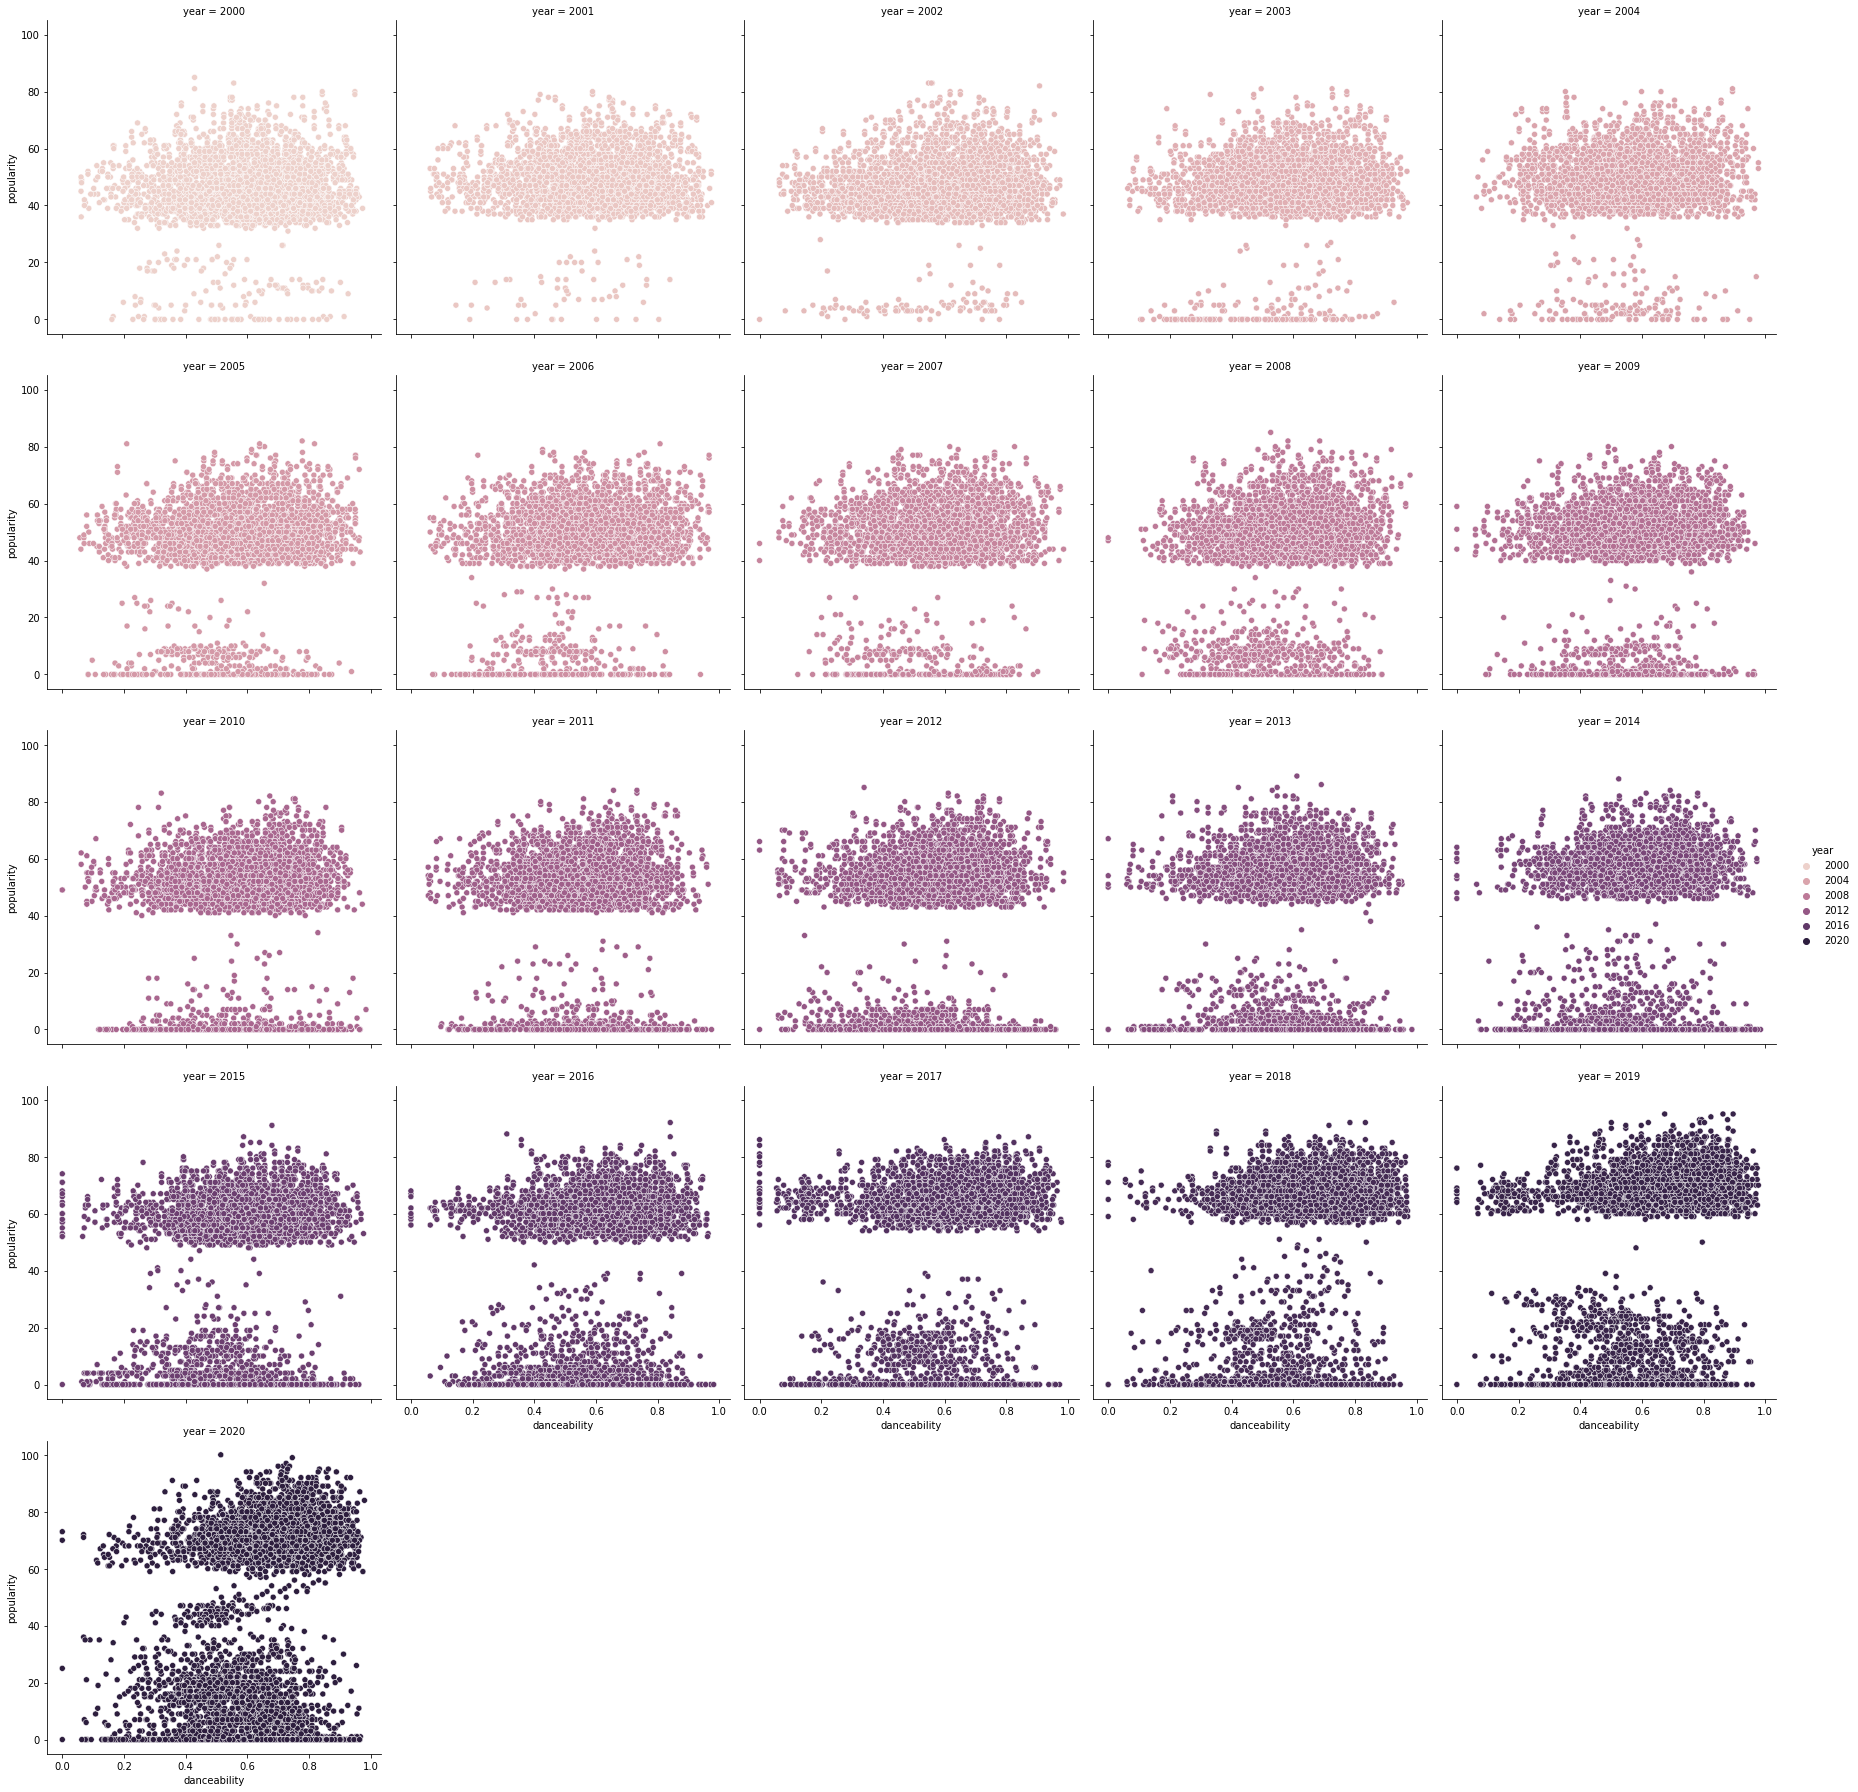

In [30]:
plt.figure(figsize=(12,6))
sns.relplot(data=songs, x='danceability', y='popularity', col='year', hue='year', kind='scatter', col_wrap=5)

In the earlier years in our dataset, there seems to be a more widespread distribution of popular songs, regardless of their danceability. However, more recent years have illustrated that the most popular songs have the highest levels of danceability. This isn't to say that a song needs to have a high level of danceability, as there are plenty of popular songs that are not as "dancey".

# Ethics & Privacy

All the data that was collected to conduct this study was directly referenced from Spotify Charts, which collects song data without associating the specific user to the data. Therefore, there shouldn’t be any individual privacy violations by the data used in this study. We don’t believe that this study or any data used in this study could be used to violate anyone's privacy due to streams being represented as a total number instead of displaying individual contributions.

As for potential biases, we believe that due to the source of our song data being solely from Spotify Charts, our results aren’t as generalizable as we had hoped. There are many other music streaming platforms such as Apple Music, Tidal, YouTube, Amazon Prime Music, and Pandora. Moreover, Spotify offers a Premium subscription that features no ads, unlimited skips, downloadable music, the ability to create a custom queue/playlist, and song choice when playing an album. Users without Premium are only allowed specific radio stations for each artist they are interested in and we believe this can have a huge influence on certain songs being streamed more than others. The song being chosen by Spotify’s algorithm could incite many forms of bias depending on song popularity, trends, and intentional song boosting. 

However, many biases we ran into early on were corrected through data cleaning. These consisted of removing duplicate songs in our dataframe due to the merging of two datasets, and removing songs with null values in any of the columns we chose to focus on.


# Conclusion & Discussion

Our initial graphs supported some trends that we had predicted, including a decrease in song duration, and an increase in tempo, song output, and danceability. However, we were proved wrong in our prediction of increased loudness and tempo over time. While there was a peak in loudness around 2010 as seen in the graphs above, it was short-lived and has been decreasing ever since then. As stated in the analysis between graphs, we believe these are due to an increase in social media dancing trends, but this could be further explored if the correlation is significant.

As previously stated, our graphs visually supported our hypothesis for song duration, song output, and danceability, but did not support our hypothesis for loudness and tempo. As for loudness, key, and tempo, initial graphs showed trends over time but our OLS regression results were not significant. During their peak moments of around 2010 to 2014, genres like Dubstep and EDM consisting of higher tempos and louder tones were popular in mainstream music. This was reflected in the increase in popularity of loudness and tempo during those years, and the subsequent decrease is also reflective of the rise in soft pop, alternative, and R&B music. Additionally, our predictions for song duration and danceability were also visually reflected in the graphs, with both showing sharp trends in more recent years (down for duration, upwards for danceability). This is interesting to note with the more recent rise in short dance music videos on various social media platforms.

Our results suggest that music has been changing to fit the demands of social media. They appear to work hand in hand when it seems to be more of a chase to catch up with how quick social media changes. This is especially prevalent in the sharp increase in the popularity of songs with higher levels of danceability. However, given the variability we experienced throughout the course of our pursuit, we must conclude that there may be other confounding factors at play that may be skewing our results. If we had the opportunity to pinpoint these factors, we would want to work with datasets with a more even distribution of songs per year. We understand that this metric could have impacted our results but we worked with raw chart data and cannot control the number of songs released each year without creating new bias. It’s been proven that a song doesn’t need to be short or danceable to be popular, but having these characteristics could give an edge to artists in comparison to others without them. Thus, it seems like music has been and will continue to evolve with the ever-developing nature of the culture surrounding social media, with some characteristics being more predictable than others. This will definitely be an interesting study to conduct again in the future to see how trends have changed over time yet again.


# Team Contributions

Overall, our group worked together on brainstorming, drafting, and writing the analysis. We worked together on a Google Document, and Soumya pushed the changes to GitHub, which is why all Git contributions are shown as by her. Alexandra wrote the conclusion & overview, Matthew recorded the final video, and Christian and Soumya worked together on writing short analysis paragraphs for the EDA section. All other sections were done together, and the entire project was reviewed by every member.